<a href="https://colab.research.google.com/github/AdwitaSingh1711/TMLC-NLP-Submission/blob/main/Worked_TMLC_Fellowship_Solution_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **E-COMMERCE TEXT CLASSIFICATION**

We firstly download the csv file from the [Kaggle](https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification) link here. The zip file thus downloaded is unzipped, and uploaded onto our collab files using the following code.


```
from google.colab import files
files.upload()
```



Alternatively, the dataset can also be uploaded on google drive and the drive can be mounted on colab, which can then be accessed through its path. Here, we've used the second method.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORTING LIBRARIES**

In [55]:
import os
from wordcloud import WordCloud
from textblob import TextBlob,Word

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import re

Now that we've mounted our google drive, we can now use pandas library to read it by including the path of our csv file.

In [57]:
data = pd.read_csv('/content/drive/MyDrive/Colab work/ecommerceDataset.csv')



---



**EXPLORATORY DATA ANALYSIS (EDA)**

Next, we analyse the shape and structure of our dataset and make the necessary changes to make our model-building process convenient. 

In [59]:
data.shape

(50424, 2)

In [60]:
data.columns

Index(['Household', 'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and s

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50424 entries, 0 to 50423
Data columns (total 2 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [62]:
data.dtypes

Household                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [63]:
data.head()

,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [64]:
data.columns = ['Classification','Description']
data.head()

,Classification,Description
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [65]:
df_new = data[data['Description'].notnull()]

In [66]:
data.loc[[49000]]

,Classification,Description
49000,Electronics,"AmazonBasics Mobile Phone Repair Kit,Black"




---



**DATA VISUALISATION**

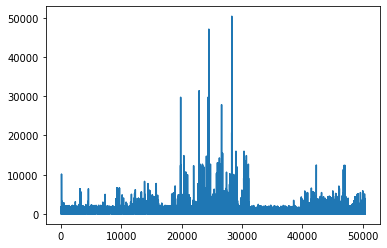

In [67]:
data['Description'].str.len().plot()

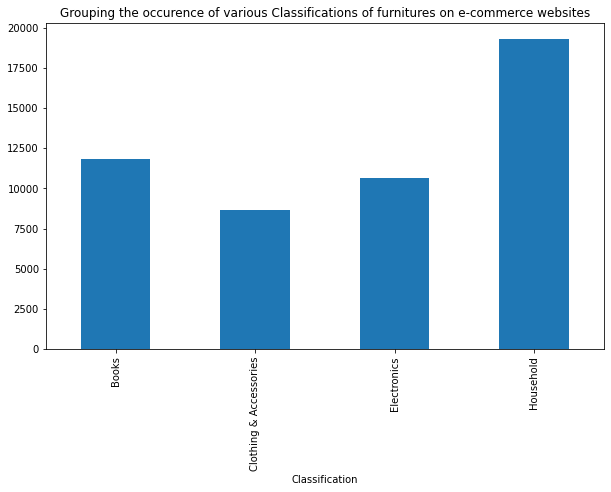

In [68]:
fig = plt.figure(figsize=(10,6))
data.groupby('Classification').Description.count().plot.bar(ylim=0)
plt.title("Grouping the occurence of various Classifications of furnitures on e-commerce websites")
plt.show()

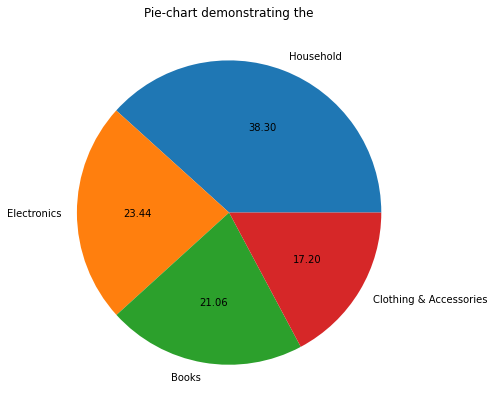

In [96]:
plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
plt.pie(data['Classification'].value_counts(),labels=["Household","Electronics","Books","Clothing & Accessories"],autopct="%0.2f")
plt.title('Pie-chart demonstrating the')
plt.show()



---



**DATA PREPROCESSING**

Data preprocessing is performed before building our models to make sure that our model isn't hindered by any unecessary information such as unrelevant numeric data (for eg, size of furniture in our case), punctuations, stopwords and repeated words that add 0 value to our analysis. 

We do this by executing the following steps:

1. Converting all text into lowercase since the machine interprets words with uppercase and lowercase letters separately

In [69]:
data['Description']=data['Description'].str.lower()

2. Removing stopwords

In [70]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
import nltk.corpus
from nltk.corpus import stopwords

In [72]:
stop_words = stopwords.words('english')
data['Description'] = data['Description'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

3. Removing punctuations and numbers:

In [73]:
data['Description']=data['Description'].replace('/[\W]+/gm','')
def removeDigits(self,tweet):
        return re.sub(r"[0-9]","",tweet)

4. Removing unusable and repeated words:

In [74]:
stop_words12 = stopwords.words('english') + ['use', 'easy', 'cm', 'made', 'keep', 'used','perfect','saf', 'SAF']
# apply the same code as above
data['Description'] = data['Description'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words12))

The apply function applies the lambda function to both rows and columns. 
Basically we spilit our string wherever these particular words appear, put a blank in those areas and rejoins it.

Preprocessing to remove visibly unecessary words is done. 
We next move on to create a Wordcloud, which is also an excellent tool for checking how effective our preprocessing was


The following code can be edited to show word clouds for all four classifications in our data, i.e Electroonics,Household, Books, and Clothing and Accessories
```
#plotting a word cloud to check if our preprocessing was done rightly
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.Classification == 'Books'].Description))
plt.imshow(wc , interpolation = 'bilinear')
```



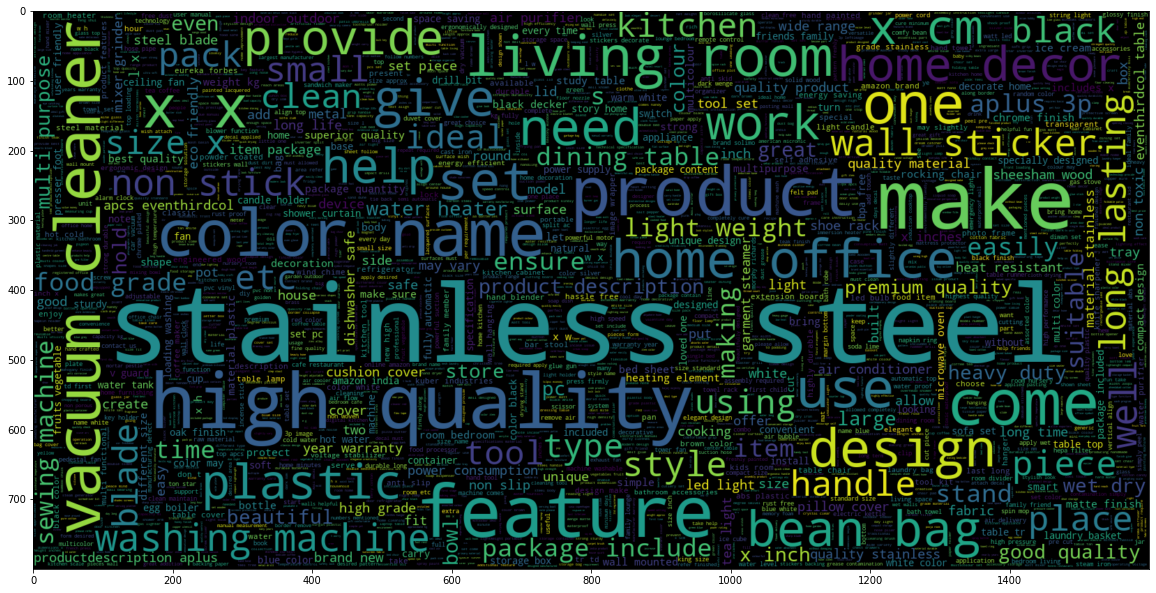

In [76]:
#plotting a word cloud to check if our preprocessing was done rightly
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.Classification == 'Household'].Description))
plt.imshow(wc , interpolation = 'bilinear')

In [29]:
data.Classification.unique()

array(['Household', 'Books', 'Clothing & Accessories', 'Electronics'],
      dtype=object)



---



**SPLITTING THE DATASET**

Firstly, we import the train_test_split model from the sklearn package.
We then split our code into random training and testing values.

In [77]:
from sklearn.model_selection import train_test_split

x = data.Description
y = data.Classification

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

In [78]:
print("Train Data size:", len(x_train))
print("Test Data size", len(x_test))

Train Data size: 35296
Test Data size 15128


In [79]:
x_train.head(10)

41635    acer 18.5 inch (46.99 cm) led monitor - eb192q...
48888    soumik electricals 5-inch subwoofer maximum 4 ...
5179     santosha decor mdf wall decoration intersectin...
344      lotus herbals ecostay kajal, 1.2g formula give...
6702     okayji cotton heat proof microwave oven gloves...
12642    philips hd9303/02 1.2-litre electric kettle (m...
34692    finger's men hooded cotton zipper jacket - sle...
17121    klaxon g0213it0032-2p brass classical rajwadi ...
16625    lilone gifts eiffel tower 4 bells copper wind ...
42190    iball slide dazzle i7 tablet (7 inch, 8gb, wi-...
Name: Description, dtype: object



---



**BUILDING A PIPELINE**

We now contruct an NLP Pipeline that includes our processed data, vectorised words (with them help of TfidfVectorizer), and the Multinomial Naiver Bayes model which we would be using for making prediction here.

In [80]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

The Naive Bayes method cannot be used to estimate numerical values but is effective at categorising text-based input. Additionally, it handles datasets with ease and is quite scalable. Based on the Bayes Theorem, which describes the likelihood that an event B will occur if event A has already occurred, is multinomial naive bayes.





The Multinomial Naive Bayes algorithm, which is very effective for NLP issues, forecasts the tag of a text, such as an email or newspaper article. For a given sample, it determines the probabilities of each tag, and then outputs the tag with the highest probability.


The fact that we can use this medthod for both continous and discrete data is an added advantage.

In [81]:
modl = Pipeline([
               ('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])

We have now fed both our vectorizer and the algorithm we would be using into our NLP pipeline. 

It is now time to fit our model to see how well it generalises the similar data as compared to the one it was trained on.

In [82]:
modl.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [83]:
predictions = modl.predict(x_test)

In [84]:
from sklearn.metrics import accuracy_score
print('accuracy %s' % accuracy_score(predictions, y_test))

accuracy 0.9427551560021152


**CONFUSION MATRIX AND F1-SCORE**

We now plot a confusion matrix to define and analyse the performance of our classification algorithm.

In [85]:
#importing libraries for plotting confusion matrix

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [86]:
# Predicting with a test dataset
y_predicted = modl.predict(x_test)
#defining confusion matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[3248,   20,   40,  244],
       [   4, 2431,   10,  135],
       [  51,    3, 2852,  246],
       [  39,   16,   58, 5731]])

Text(69.0, 0.5, 'Truth')

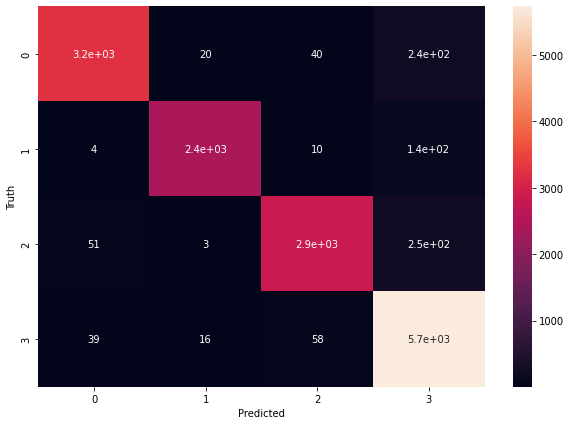

In [87]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

As has been provided to us, we know that the following classifications stand for their corresponding values:

1.   Electronic (0)
2.   Households (1)
3.   Books (2)
4.   Clothing & Accessories (3)

In [88]:
# Displaying Model Accuracy
print("Naive Bayes Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("Naive Bayes Precision:",metrics.precision_score(y_test, y_predicted,average="macro"))
print("Naive Bayes Recall:",metrics.recall_score(y_test, y_predicted,average="macro"))


# Classification Report

print("\n"+classification_report(y_test, y_predicted, target_names=["Electronics","Household","Books","Clothing & Accessories"], digits=4))

Naive Bayes Accuracy: 0.9427551560021152
Naive Bayes Precision: 0.9553162213090072
Naive Bayes Recall: 0.9355371850677946

                        precision    recall  f1-score   support

           Electronics     0.9719    0.9144    0.9423      3552
             Household     0.9842    0.9422    0.9628      2580
                 Books     0.9635    0.9048    0.9332      3152
Clothing & Accessories     0.9017    0.9807    0.9395      5844

              accuracy                         0.9428     15128
             macro avg     0.9553    0.9355    0.9444     15128
          weighted avg     0.9451    0.9428    0.9428     15128



We've thus, performed text classification on the given e-commerce dataset.